#**TITANIC SURVIVAL PREDICTION**

In [1]:
#Importing All Required Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

In [5]:
#Loading Datasets
pd.set_option('display.max_columns',10,'display.width',1000)
titanic = pd.read_csv("/content/Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [6]:
# Display shape of the file data

In [7]:
titanic.shape

(891, 12)

In [54]:
# Droping Useless Columns
if 'Ticket' in titanic.columns:
    titanic = titanic.drop(['Ticket'], axis=1)
if 'Cabin' in titanic.columns:
    titanic = titanic.drop(['Cabin'], axis=1)
if 'Name' in titanic.columns:
    titanic = titanic.drop(['Name'], axis=1)

In [9]:
# Checking for Null values
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
# Description of dataset

titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [15]:
titanic.groupby("Survived").mean(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [17]:
numeric_columns = titanic.select_dtypes(include=np.number).columns
correlation_matrix = titanic[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


Number of males and females in titanic

In [18]:
male_ind = len(titanic[titanic['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 577


In [19]:
female_ind = len(titanic[titanic['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 314


Representation of passengers

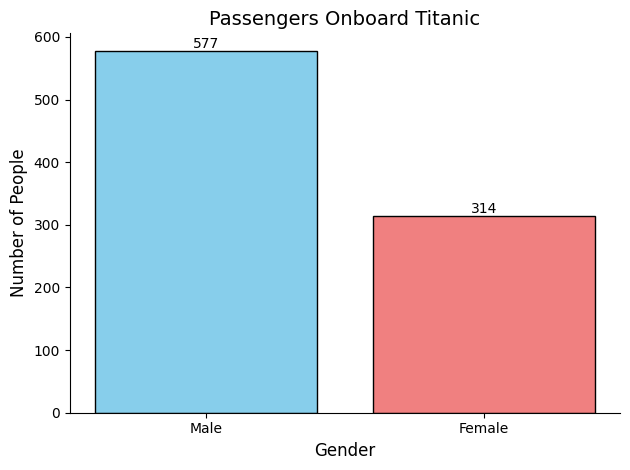

In [23]:
#Plotting
fig, ax = plt.subplots()
gender = ['Male', 'Female']
index = [577, 314]
bars = ax.bar(gender, index, color=['skyblue', 'lightcoral'], edgecolor='black')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            str(height), ha='center', va='bottom')

ax.set_title('Passengers Onboard Titanic', fontsize=14)  # Add a title
ax.set_xlabel("Gender", fontsize=12)  # Customize x-axis label
ax.set_ylabel("Number of People", fontsize=12)  # Customize y-axis label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [26]:
alive = len(titanic[titanic['Survived'] == 1])
dead = len(titanic[titanic['Survived'] == 0])
titanic.groupby('Sex')[['Survived']].mean(numeric_only=True)

,Survived
Sex,
female,0.742038
male,0.188908


Representation of survival outcomes


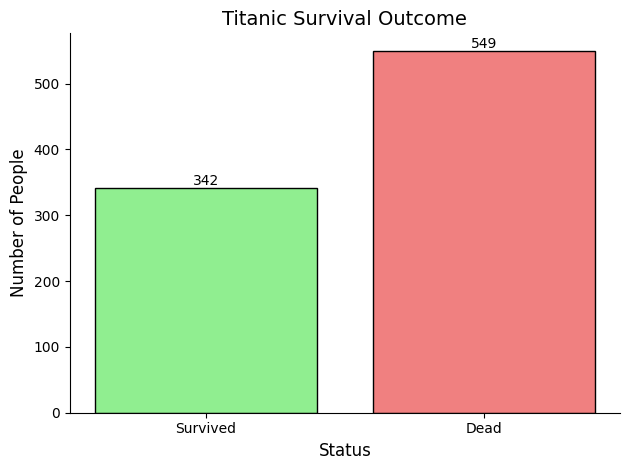

In [27]:
# plotting
fig, ax = plt.subplots()
status = ['Survived', 'Dead']
ind = [alive, dead]
bars = ax.bar(status, ind, color=['lightgreen', 'lightcoral'], edgecolor='black')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            str(height), ha='center', va='bottom', fontsize=10)

ax.set_title('Titanic Survival Outcome', fontsize=14)
ax.set_xlabel("Status", fontsize=12)
ax.set_ylabel("Number of People", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Survival outcome from respective Pclass

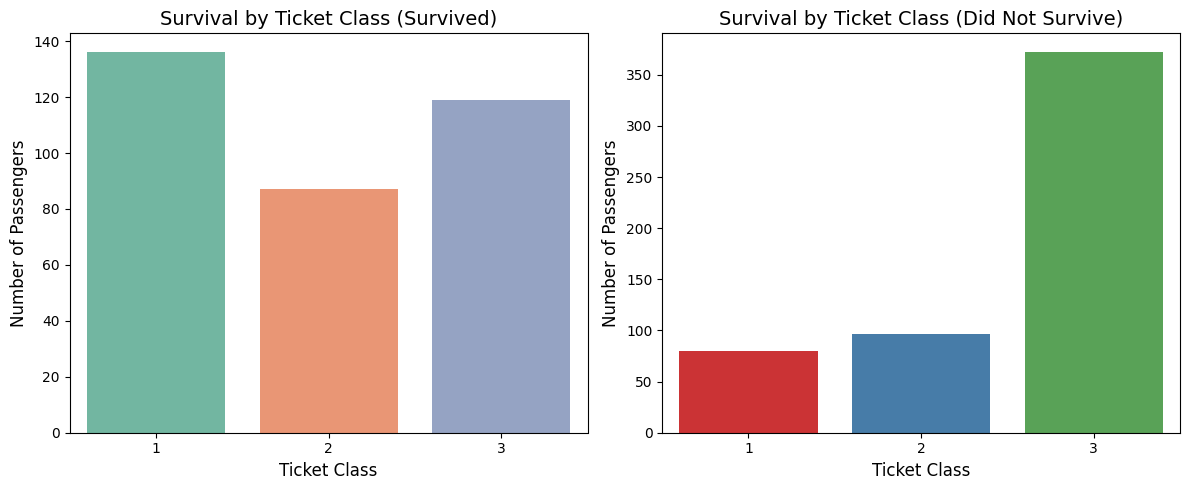

In [30]:
# importing seaborn  for more attarctive representation
import seaborn as sns
plt.figure(figsize=(12, 5))

# Graph 1: Survival Based on Ticket Class (For those who survived)
plt.subplot(1, 2, 1)
sns.countplot(data=titanic[titanic['Survived'] == 1], x='Pclass', palette='Set2')
plt.title('Survival by Ticket Class (Survived)', fontsize=14)
plt.xlabel('Ticket Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

# Graph 2: Survival Based on Ticket Class (For those who did not survive)
plt.subplot(1, 2, 2)
sns.countplot(data=titanic[titanic['Survived'] == 0], x='Pclass', palette='Set1')
plt.title('Survival by Ticket Class (Did Not Survive)', fontsize=14)
plt.xlabel('Ticket Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

plt.tight_layout()
plt.show()

Survival outcome from different range of age

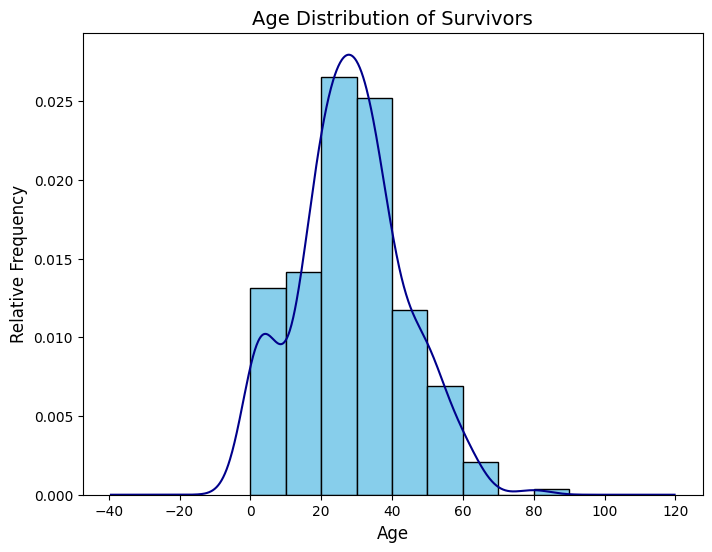

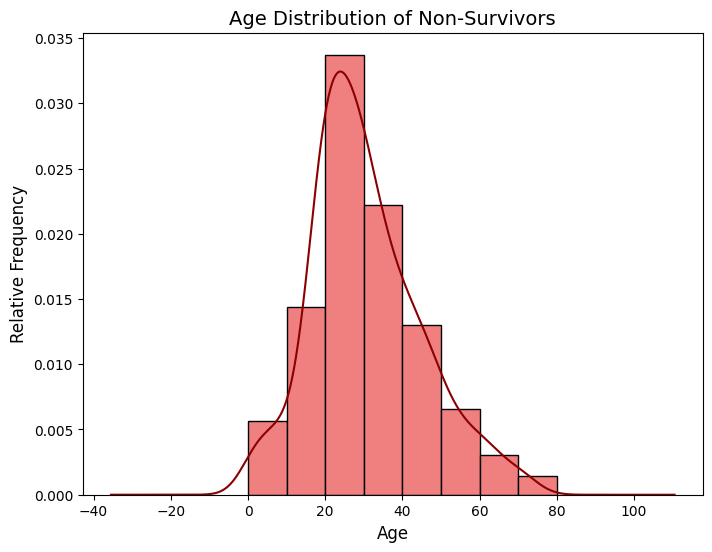

In [36]:
# Figure 1: Age Distribution of Survivors
plt.figure(1, figsize=(8, 6))
plt.hist(titanic.loc[titanic.Survived == 1, 'Age'], bins=np.arange(0, 100, 10),
         color='skyblue', edgecolor='black', density=True)
titanic.loc[titanic.Survived == 1, 'Age'].plot.kde(color='darkblue')
plt.title('Age Distribution of Survivors', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Relative Frequency', fontsize=12)

# Figure 2: Age Distribution of Non-Survivors
plt.figure(2, figsize=(8, 6))
plt.hist(titanic.loc[titanic.Survived == 0, 'Age'], bins=np.arange(0, 100, 10),
         color='lightcoral', edgecolor='black', density=True)
titanic.loc[titanic.Survived == 0, 'Age'].plot.kde(color='darkred')
plt.title('Age Distribution of Non-Survivors', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Relative Frequency', fontsize=12)
plt.show()

In [32]:
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [33]:
titanic[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [34]:
titanic[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [35]:
titanic[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Representation from various embarked cities

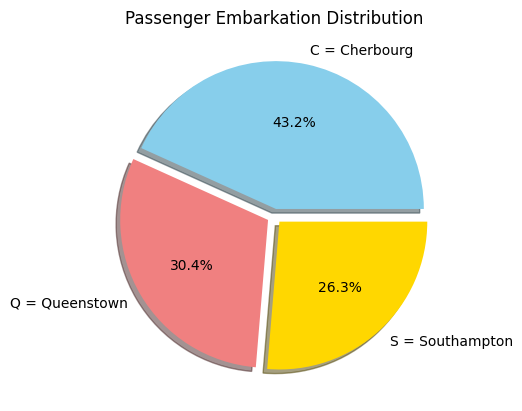

In [40]:
# pie chart
labels = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
sizes = [0.553571, 0.389610, 0.336957]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral', 'gold'],
        explode=[0.05, 0.05, 0.05], shadow=True)
plt.title('Passenger Embarkation Distribution')
plt.show()

In [55]:
# Feature Selection
column_titanic=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
# training values
X=titanic[column_titanic]
# target value
Y=titanic['Survived']


In [56]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [57]:
#  to fill all the missing values
# age have 177  missing values
#  fill missing values with mean or median form existing values
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [58]:
X['Embarked'] = titanic['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [59]:
# to convert sex into integer value
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [60]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

,Embarked
0,2
1,0
2,2
3,2
4,2


Observing accuracy using ML model

In [63]:
# With my personal preference I am using Naive Bayes algorithms for training my model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [65]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.7686567164179104


In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred)
print(confusion_mat)
print(classification_report(Y_test,y_pred))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

